In [5]:
!pip install xlrd


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

In [19]:
file_path = './country_wise_latest.xls'
covid_data = pd.read_csv(file_path,index_col='Country/Region')

In [20]:
covid_data.head()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
Country/Region,,,,,,,,,,,,,,
Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [21]:
covid_empty = covid_data[covid_data.isnull().any(axis=1)]
print(covid_empty)

Empty DataFrame
Columns: [Confirmed, Deaths, Recovered, Active, New cases, New deaths, New recovered, Deaths / 100 Cases, Recovered / 100 Cases, Deaths / 100 Recovered, Confirmed last week, 1 week change, 1 week % increase, WHO Region]
Index: []


#### no null values great!

# Univariate visualizations(single variable)

## Bar Chart

In [23]:
# top 10 countries with most confiredm cases
covid_data['Confirmed'].nlargest(10)

Country/Region
US                4290259
Brazil            2442375
India             1480073
Russia             816680
South Africa       452529
Mexico             395489
Peru               389717
Chile              347923
United Kingdom     301708
Iran               293606
Name: Confirmed, dtype: int64

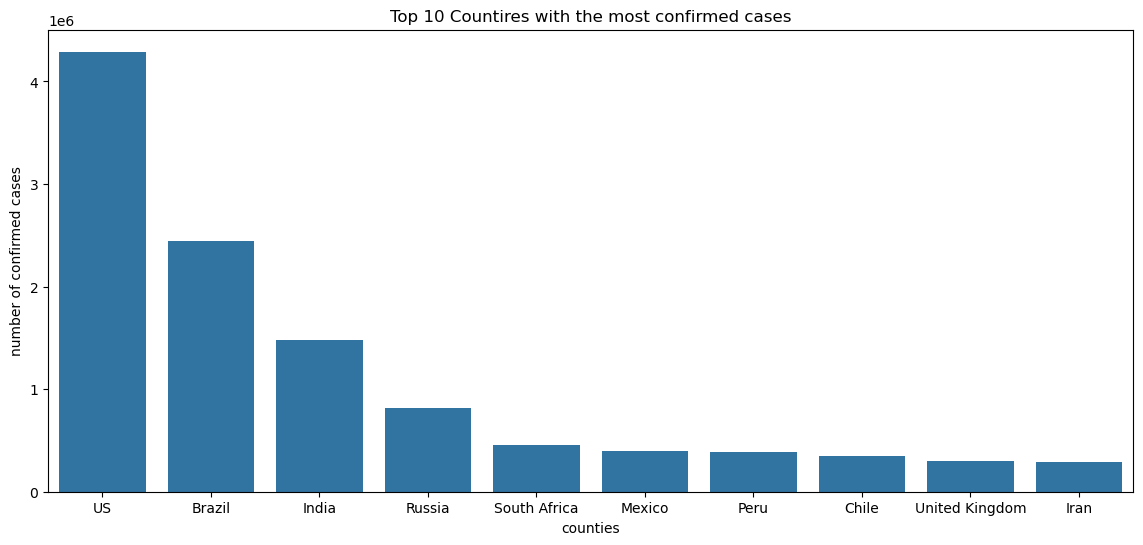

In [30]:
plt.figure(figsize=(14,6))
sns.barplot(covid_data['Confirmed'].nlargest(10))
plt.title('Top 10 Countires with the most confirmed cases')
plt.xlabel("counties")
plt.ylabel("number of confirmed cases")
plt.show()

## Histogram Chart

In [32]:
# Death rate
covid_data.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase', 'WHO Region'],
      dtype='object')

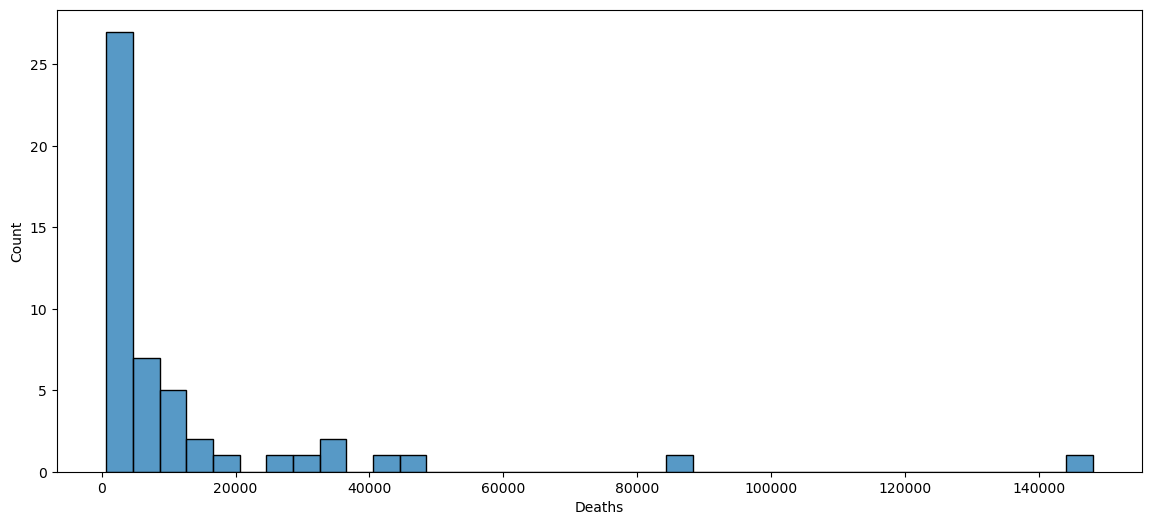

In [39]:
plt.figure(figsize=(14,6))
sns.histplot(covid_data['Deaths'].nlargest(50))
plt.show()

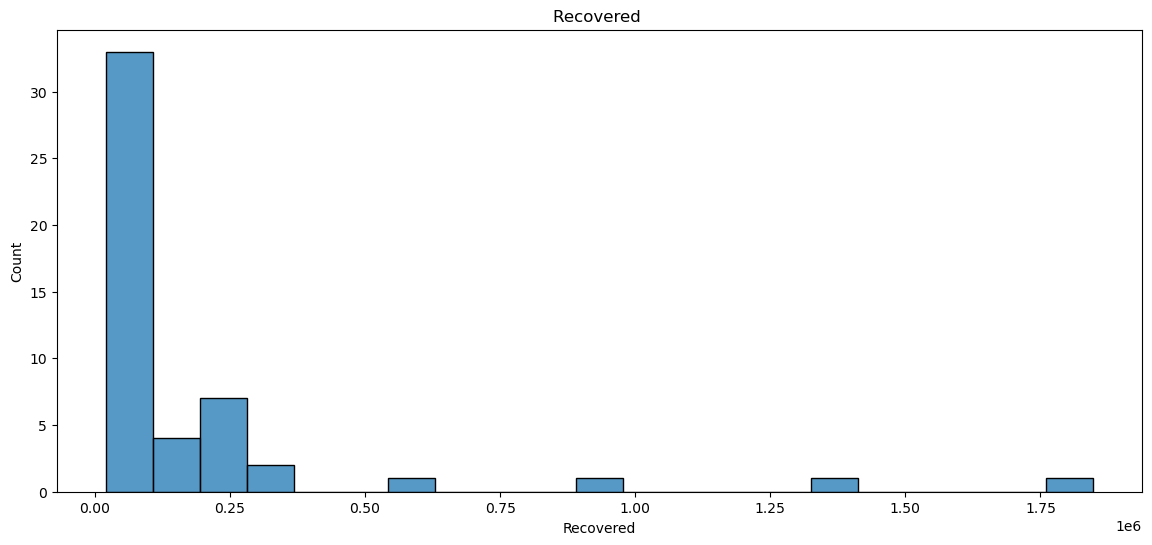

In [50]:
#  Recovered
plt.figure(figsize=(14,6))
plt.title("Recovered ")
sns.histplot(covid_data['Recovered'].nlargest(50))
plt.show()

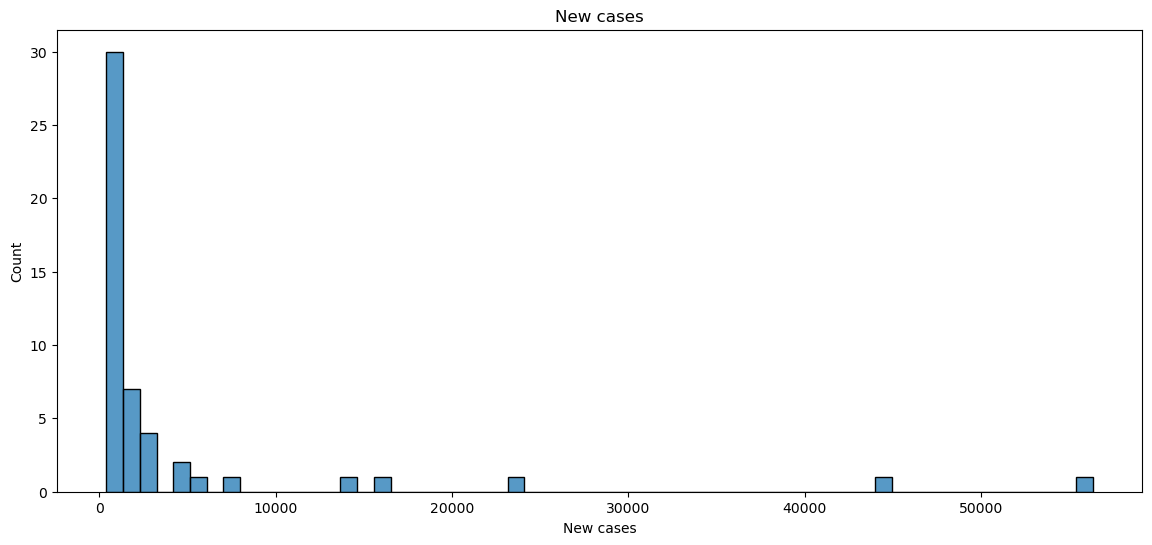

In [49]:
# new cases

plt.figure(figsize=(14,6))
plt.title('New cases')
sns.histplot(covid_data['New cases'].nlargest(50))
plt.show()

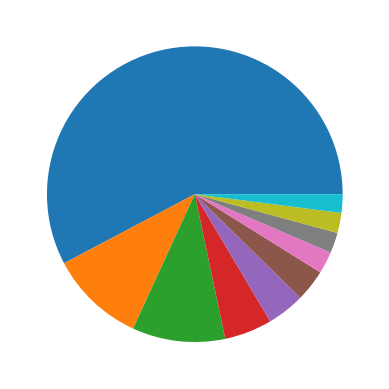

In [56]:
# pie chart
plt.pie(covid_data['Active'].nlargest(10))
plt.show()

# Bivariate VIsualizations

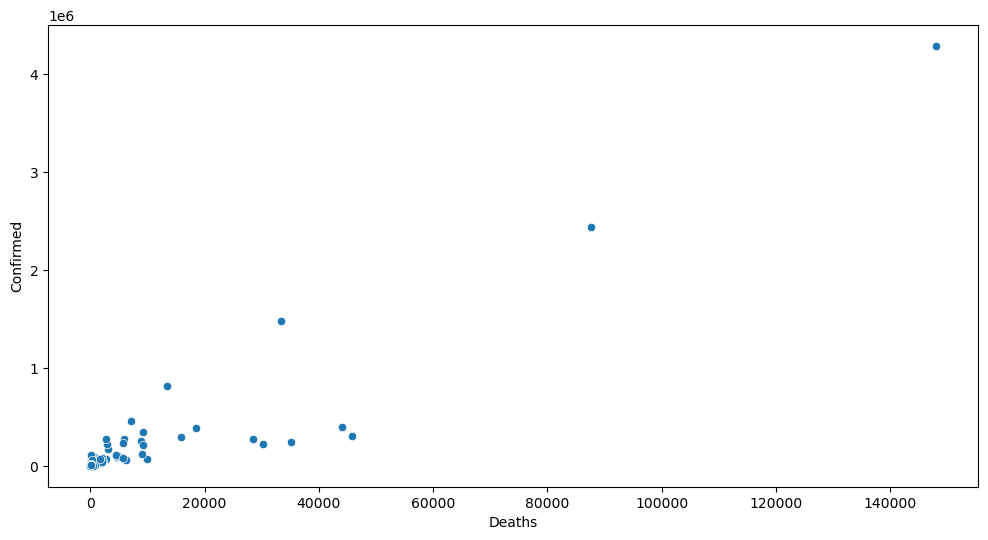

In [58]:
# scatter plot
plt.figure(figsize=(12,6))
plt.title('Confirmed vs Deaths')
sns.scatterplot(x= covid_data['Deaths'],y=covid_data['Confirmed'])
plt.show()

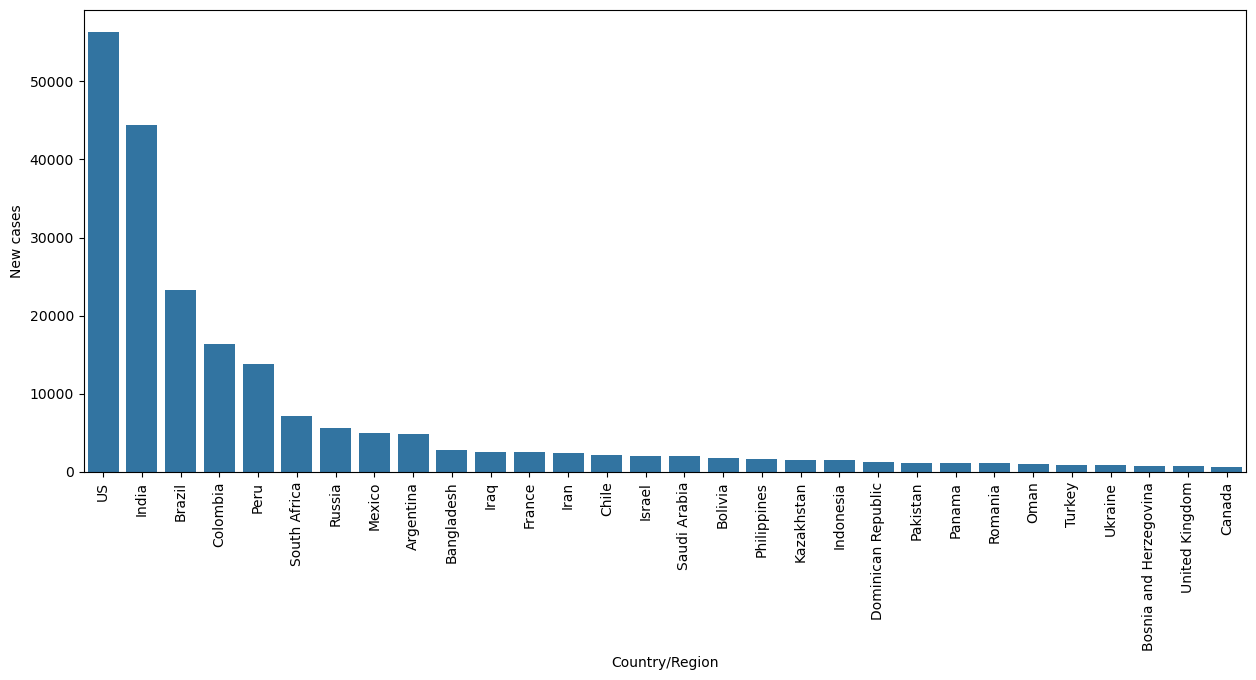

In [64]:
# cases 
plt.figure(figsize=(15,6))
sns.barplot(covid_data['New cases'].nlargest(30))
plt.xticks(rotation='vertical')
plt.show()

In [65]:
covid_data.columns

Index(['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths',
       'New recovered', 'Deaths / 100 Cases', 'Recovered / 100 Cases',
       'Deaths / 100 Recovered', 'Confirmed last week', '1 week change',
       '1 week % increase', 'WHO Region'],
      dtype='object')

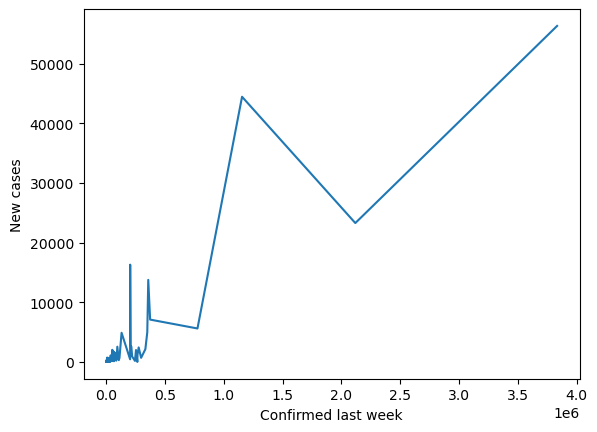

In [68]:
sns.lineplot(x=covid_data['Confirmed last week'],y=covid_data['New cases'])
plt.show()

<Axes: ylabel='Country/Region'>

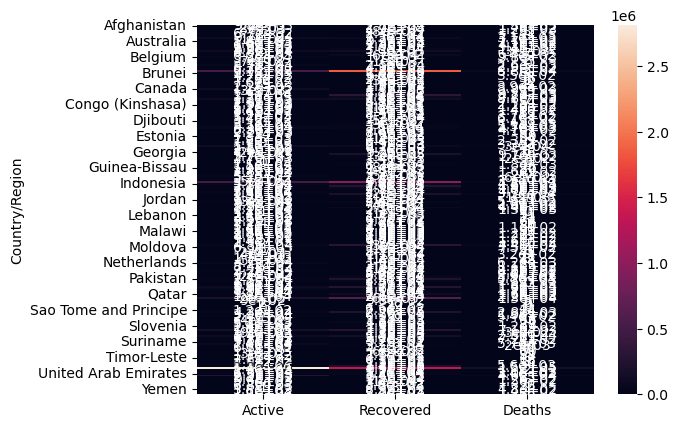

In [75]:
# heatmap
# Select multiple numeric columns for heatmap
heatmap_data = covid_data[['Active', 'Recovered', 'Deaths']]
sns.heatmap(heatmap_data, annot =True)